In [1]:
# [1-1] 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

# [1-2] 데이터 준비
DATA_FILE = '../data/fish.csv'

# 데이터 로딩 (농어 생선의 무게와 길이)
fishDF = pd.read_csv(DATA_FILE, skiprows=73, skipfooter=31, engine='python', usecols=[1, 2])  # 무게: 1, 길이: 2

# 피처(feature)와 타겟(target) 분리
featureDF = fishDF[[fishDF.columns[-1]]]  # 길이
targetDF = fishDF[fishDF.columns[0]]  # 무게

# 데이터 크기 확인
print(f'featureDF {featureDF.shape}, featureDF {featureDF.ndim}D')
print(f'targetDF {targetDF.shape}, targetDF {targetDF.ndim}D')

# [3-2] 데이터셋 분리 -> 학습용 : 테스트용 = 75% : 25%
X_train, X_test, Y_train, Y_test = train_test_split(featureDF, targetDF, random_state=10, test_size=0.25)

# 데이터 크기 출력
print(f'X_data {X_train.shape}, train_label {Y_train.shape}')
print(f'test_data {X_test.shape}, test_label {Y_test.shape}')

# 인덱스 리셋
X_train.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
Y_test.reset_index(drop=True, inplace=True)

# 인덱스 확인
print("Train Data Index:", X_train.index, Y_train.index)
print("Test Data Index:", X_test.index, Y_test.index)

# [4-1] 알고리즘 객체 생성 (KNN 회귀 모델)
model = KNeighborsRegressor()

# [4-2] 모델 학습 (훈련 데이터 사용)
model.fit(X_train, Y_train)

# fit 후 학습된 데이터 확인
print("모델 학습 정보:")
print(f"n_features_in_: {model.n_features_in_}")  # 입력 특징 수
print(f"n_samples_fit_: {model.n_samples_fit_}")  # 학습한 샘플 수
print(f"effective_metric_: {model.effective_metric_}")  # 거리 계산 방법

# [4-3] 훈련 데이터에 대한 예측
pre_train_weight = model.predict(X_train)
pre_test_weight = model.predict(X_test)

# 예측값 크기 확인
print(f"pre_train_weight.shape: {pre_train_weight.shape}")
print(f"pre_test_weight.shape: {pre_test_weight.shape}")

# 모델 성능 평가
def checkModel(trainDS, testDS, model):
    """
    모델 성능 평가 함수
    - 학습 데이터와 테스트 데이터를 입력받아 모델의 score, rmse, mse, mae 계산
    """
    result = []  # 성능 평가 결과 저장

    for data, label in [trainDS, testDS]:
        # 모델 예측값 생성
        pre_label = model.predict(data)

        # 모델 적합도 평가
        score = model.score(data, label)

        # 오차 계산 (RMSE, MSE, MAE)
        rmse = root_mean_squared_error(label, pre_label)
        mse = mean_squared_error(label, pre_label)
        mae = mean_absolute_error(label, pre_label)

        # 성능 결과 저장 (튜플 형태)
        result.append((score, rmse, mse, mae))

    # 결과를 DataFrame으로 변환
    resultDF = pd.DataFrame(result, columns=['score', 'rmse', 'mse', 'mae'], index=['X_train', 'X_test'])
    
    return resultDF  # 성능 평가 결과 반환

# [5] 모델 성능 평가 실행
result_df = checkModel((X_train, Y_train), (X_test, Y_test), model)

# 성능 평가 결과 출력
print(result_df)

featureDF (56, 1), featureDF 2D
targetDF (56,), targetDF 1D
X_data (42, 1), train_label (42,)
test_data (14, 1), test_label (14,)
Train Data Index: RangeIndex(start=0, stop=42, step=1) RangeIndex(start=0, stop=42, step=1)
Test Data Index: RangeIndex(start=0, stop=14, step=1) RangeIndex(start=0, stop=14, step=1)
모델 학습 정보:
n_features_in_: 1
n_samples_fit_: 42
effective_metric_: euclidean
pre_train_weight.shape: (42,)
pre_test_weight.shape: (14,)
            score       rmse          mse        mae
X_train  0.978457  54.167305  2934.096924  34.982381
X_test   0.955707  44.636380  1992.406429  31.835714


### [ 모델 성능평가에서 문제점을 개선하기 위해서 추가 작업 진행 ]
- 손실/비용함수 값이 큼 ==> 직선을 곡선의 형태 수식
- 기존 존재하는 피쳐를 활용해서 피쳐 생성 ==> 다항 회귀

선형이 아닌건 아니기에 linearRegression을 사용하지만 2차 곡선으로 그리려고 함

[6] 특성공학 => 피쳐 생성 후 추가<hr>
- 관련 모듈 로딩
- 학습 진행 전에 전처리 단계에서 피쳐 추가

In [2]:
## [6-1] 모듈 로딩
from sklearn.preprocessing import PolynomialFeatures

In [3]:
## [6-2] PolynomialFeatures 클래스 사용법 # 강사님이 sklearn 홈페이지에서 확인하심
## - 임시데이터
x = [[1,2]]

## - 객체/인스턴스 생성 
poly = PolynomialFeatures() # 마우스 올려보면 기본 차수(degree)가 2로 되어있음
# poly = PolynomialFeatures(degree=3) # 3차
# 차수를 늘리면 과대적합이 될 수 있는 가능성이 있다. 직접 확인해 보세요~ ^__^
# 손실값을 줄이기 위한 방법입니다!

## - 객체/인스턴스에 피쳐 생성할 정보 제공
poly.fit(x) # 임시데이터를 줘봅시다. 

poly.n_features_in_ # 제공된 x의 피쳐의 수가 2인것을 확인할 수 있음

print('n_features_in_    :', poly.n_features_in_)     # 2개 집어넣었는데
print('n_output_features_:', poly.n_output_features_) # 6개 출력해줄게~

## - 피쳐를 생성해서 추가
poly.transform(x) # 6개의 피쳐를 줌

n_features_in_    : 2
n_output_features_: 6


array([[1., 1., 2., 1., 2., 4.]])

In [4]:
## - 객체/인스턴스 생성
poly = PolynomialFeatures(interaction_only=True) # 피쳐끼리 곱셈값만 적용, 제곱의 값이 들어가지 않아서 피쳐값이 준다는거죠

## - 객체/인스턴스에 피쳐 생성할 정보 제공
poly.fit(x)

print('n_features_in_    :', poly.n_features_in_)
print('n_output_features_:', poly.n_output_features_)

## - 피쳐를 생성해서 추가
poly.transform(x)

n_features_in_    : 2
n_output_features_: 4


array([[1., 1., 2., 2.]])

In [5]:
# - 객체/인스턴스 생성
# poly = PolynomialFeatures(include_bias=False, interaction_only=False) # 절편값 1 제외 # 피쳐끼리 곱셈값
poly = PolynomialFeatures(degree=5,include_bias=False, interaction_only=True) # 절편값 1 제외 # 피쳐끼리 곱셈값만 적용 --> 5차로 하더라도 피쳐의 개수가 같아짐

## - 객체/인스턴스에 피쳐 생성할 정보 제공
poly.fit(x)

print('n_features_in_    :', poly.n_features_in_)
print('n_output_features_:', poly.n_output_features_)

## - 피쳐를 생성해서 추가
poly.transform(x)

n_features_in_    : 2
n_output_features_: 3


array([[1., 2., 2.]])

In [6]:
# - 객체/인스턴스 생성
poly = PolynomialFeatures(include_bias=False) # 절편값 1 제외

## - 객체/인스턴스에 피쳐 생성할 정보 제공 + 피쳐를 생성해서 추가
## fit_transform()
x2 = poly.fit_transform(x)

print('n_features_in_    :', poly.n_features_in_)
print('n_output_features_:', poly.n_output_features_)
print(x2)

n_features_in_    : 2
n_output_features_: 5
[[1. 2. 1. 2. 4.]]


In [7]:
## [6-3] 데이터셋 즉, 학습용/테스트용 데이터셋 피쳐 추가
## - 학 습 용 : X_train
## - 테스트용 : X_test
## -> 학습용 데이터셋으로 피쳐 추가 정보 제공
poly = PolynomialFeatures()

## -> 학습용 피쳐 제공
poly.fit(X_train)
poly.fit(X_test)

## -> 학습용/테스터용 피쳐 추가
poly_train = poly.transform(X_train)
poly_test = poly.transform(X_test)


In [8]:
print(f'[학 습 용 데이터 피쳐] ==> {type(poly_train)}, {poly_train.shape}')
print(f'[테스터용 데이터 피쳐] ==> {type(poly_test)}, {poly_test.shape}')


[학 습 용 데이터 피쳐] ==> <class 'numpy.ndarray'>, (42, 3)
[테스터용 데이터 피쳐] ==> <class 'numpy.ndarray'>, (14, 3)


[7] 재학습 <hr>

In [9]:
## - 선형회귀인스턴스 생성
model = LinearRegression()

In [10]:
## - 학습
model.fit(poly_train, Y_train)

LinearRegression()

In [11]:
# - 모델 파라미터
print(f'coef_     : {model.coef_}')
print(f'intercept_: {model.intercept_}')

coef_     : [  0.         -20.00925677   0.97632617]
intercept_: 102.88962471646624


[8] 재학습 평가<hr>

In [12]:
## [8-1] 시각화 - 곡선 회귀선
import numpy as np

## - 곡선 회귀식에 대입할 데이터
# x=np.linspace(1, 42, 42) # linspace 최소 최대 사이를 균일하게 나누어 주는 함수
x=np.linspace(1, 42)# 1 <= ~ <= 42 범위에서 균등하게 50개[기본값] 데이터 생성
print('shape :', x.shape)
print(x)

shape : (50,)
[ 1.          1.83673469  2.67346939  3.51020408  4.34693878  5.18367347
  6.02040816  6.85714286  7.69387755  8.53061224  9.36734694 10.20408163
 11.04081633 11.87755102 12.71428571 13.55102041 14.3877551  15.2244898
 16.06122449 16.89795918 17.73469388 18.57142857 19.40816327 20.24489796
 21.08163265 21.91836735 22.75510204 23.59183673 24.42857143 25.26530612
 26.10204082 26.93877551 27.7755102  28.6122449  29.44897959 30.28571429
 31.12244898 31.95918367 32.79591837 33.63265306 34.46938776 35.30612245
 36.14285714 36.97959184 37.81632653 38.65306122 39.48979592 40.32653061
 41.16326531 42.        ]


In [13]:
## - 곡선 회귀식 : y = x^0*w0 + x^1*w1 + x^2*w2 + b
y = (1*model.coef_[0]) + (x * model.coef_[1]) + ((x ** 2) * model.coef_[2]) + model.intercept_
## x^0, x^1, x^2 = 1, 3, 5
print('shape :', {y.shape})
print(y)

shape : {(50,)}
[8.38566941e+01 6.94316571e+01 5.63737206e+01 4.46828848e+01
 3.43591496e+01 2.54025150e+01 1.78129810e+01 1.15905477e+01
 6.73521496e+00 3.24698286e+00 1.12585137e+00 3.71820510e-01
 9.84890267e-01 2.96506064e+00 6.31233164e+00 1.10267033e+01
 1.71081755e+01 2.45567484e+01 3.33724218e+01 4.35551959e+01
 5.51050706e+01 6.80220460e+01 8.23061219e+01 9.79572985e+01
 1.14975576e+02 1.33360954e+02 1.53113432e+02 1.74233011e+02
 1.96719691e+02 2.20573471e+02 2.45794352e+02 2.72382333e+02
 3.00337416e+02 3.29659598e+02 3.60348882e+02 3.92405266e+02
 4.25828750e+02 4.60619336e+02 4.96777022e+02 5.34301808e+02
 5.73193695e+02 6.13452683e+02 6.55078771e+02 6.98071960e+02
 7.42432250e+02 7.88159640e+02 8.35254131e+02 8.83715722e+02
 9.33544415e+02 9.84740207e+02]


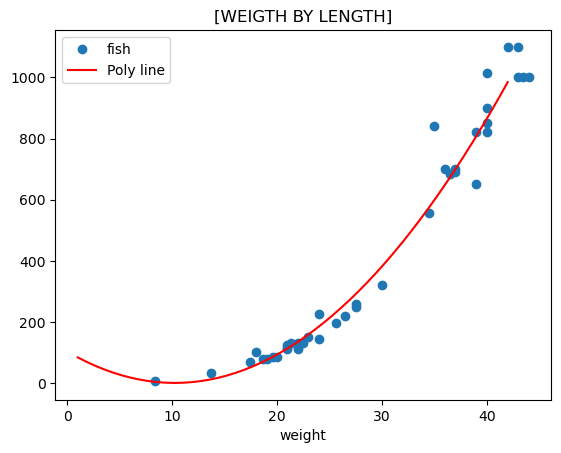

In [14]:
## 시각화 및 회귀선 --------------------------------------
## 데이터 시각화
plt.plot(X_train, Y_train, 'o', label='fish')

# 선형회귀에서 구한 y 곡선 긋기
plt.plot(x, y, 'r', label='Poly line')
plt.xlabel('length')
plt.xlabel('weight')
plt.title("[WEIGTH BY LENGTH]")
plt.legend()
plt.show()

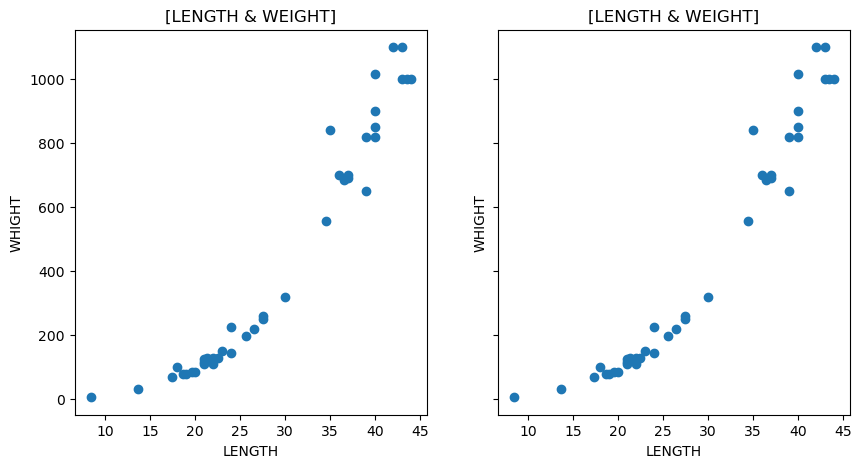

In [15]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5), sharey=True)

axes = axes.flatten() # 2D [[], []] => 1D [,]

for ax, title in zip(axes, ["Line Model", "Poly Model"]):
    ax.plot(X_train, Y_train, 'o',label='Fish')
    ax.set_xlabel("LENGTH")
    ax.set_ylabel("WHIGHT")
    ax.set_title("[LENGTH & WEIGHT]")

plt.show()